# Second Notebook: Solving the Schrödinger equation

#### Author: Andrius Burnelis

Since I am a theorist, I enjoy working in dimensionless quantities and convenient units. For the purposes of this notebook, we will set $\hbar = c = 1$. To work in the conventional units, you may multiply (or divide) appropriate factors of $\hbar c = 197$ MeV fm to give you the right units.

In this convention (and assuming a central, short ranged potential) the reduced radial Schrödinger equation is given as:

$$ \left[ \frac{d^{2}}{dr^{2}} - \frac{\ell (\ell + 1)}{r^{2}} + k^{2} + V'(r) \right] u_{\ell}(r) = 0. $$

Here we have defined $k^{2} = 2 \mu E$ and $V'(r) = - 2 \mu V_{SR}(r)$. The short range (SR) nuclear potential $V_{SR}(r)$ has the property that it has finite range so beyond a certain radius $r_{0}$, we have $V_{SR}(r \ge r_{0}) = 0$.

What we would like to do is code up some method to solve for the wavefunction in general for some central, finite potential. A simple (and easy to code) but non-physical potential is the finite square well:
$$ V_{SW}(r) = \begin{cases} -V_{0} & r < r_{0} \\ 0 & r \ge 0 \end{cases}. $$

This potential is one that we can solve analytically (easiest in the neutral case), so we can run a test case of our solver against the analytic solution. The analytic solutions for the neutral case are the spherical Bessel functions, and the normalization is fixed by our boundary conditions: the wavefunction is 0 at the origin, and the wavefunction + its derivative are continuous at the boundary. 

------------


In [1]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

Here we define our simple potential, the square well.

In [2]:
def square_well(r, r_0 = 4, V_0 = -10):
    """
    Square well potential function.
    """
    return np.where(r < r_0, V_0, 0)

Here I use the default Numerov method to solve our problem. There is nothing special I am doing here that speeds things up, in fact I purposely didn't do an easy thing that could speed this up. See if you know the trick!

In [3]:
def numerov_solve(V, r, k, l):
    """
    Solve the radial Schrödinger equation using Numerov's method.
    """
    # Get the step size and number of points
    h = r[1] - r[0]
    N = r.shape[0]

    # Initialize the wavefunction array
    u = np.zeros(N)

    # Initial conditions (at small r, u behaves like r^(l+1))
    u[0] = 0.0
    u[1] = r[1]**(l + 1)  # First order approximation

    # Define the effective potential
    V_eff = V(r) + (l * (l + 1) / np.square(r))

    # Get the numerov f
    f = k**2 - V_eff

    # Numerov loop
    for i in range(1, N - 1):
        u[i + 1] = ((2 * (1 - (5 * h**2 / 12) * f[i]) * u[i] -
                     (1 + (h**2 / 12) * f[i - 1]) * u[i - 1]) /
                    (1 + (h**2 / 12) * f[i + 1]))

    return r, u

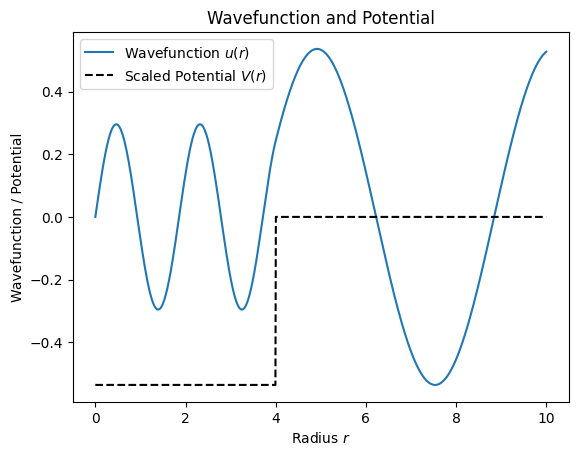

In [4]:
# Define the array of r-values, solve the SE, and define the array of the potential
r = np.linspace(1e-5, 10, 1000)
r, u = numerov_solve(square_well, r, k = 1.2, l = 0)
v = square_well(r)

# For plotting purposes, we will scale the potential to match the scale of the wavefunction
v_scaled = v * (np.max(np.abs(u)) / np.max(np.abs(v)))

# Plot the wavefunction and the potential
fig, ax = plt.subplots()
ax.plot(r, u, label = 'Wavefunction $u(r)$')
ax.plot(r, v_scaled, label = 'Scaled Potential $V(r)$', color = 'black', linestyle = '--')
ax.set_xlabel('Radius $r$')
ax.set_ylabel('Wavefunction / Potential')
ax.set_title('Wavefunction and Potential')
ax.legend()

------------
------------
## Lets see how fast it takes

In [5]:
%%timeit
numerov_solve(square_well, r, k = 1.2, l = 0)

759 μs ± 9.21 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


On my laptop it takes several hundreds of microseconds. Surely there is something better that we can do.

------------
------------
## Challenge: Do better!

You also can define your own potential and compare it!

Feel free to copy and paste any of the above code that may be relevant for you.